<a href="https://colab.research.google.com/github/shruthimohan03/video-summarizer/blob/main/GMM_for_Extractive_Summarization_NPTEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import cosine_similarity
import re
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [16]:
# Step 1: Load and preprocess the text file
def load_and_preprocess(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    # Split text into sentences based on periods or question marks
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', content)
    # Clean sentences (keep full stops, remove other punctuations, and strip extra spaces)
    sentences = [
        re.sub(r'[^a-zA-Z0-9\s\.]', '', sentence).strip() for sentence in sentences if sentence.strip()
    ]
    return sentences

In [17]:
# Step 2: Preprocess and vectorize sentences
def preprocess_and_vectorize(sentences):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    sentence_vectors = tfidf_vectorizer.fit_transform(sentences).toarray()
    return sentence_vectors

In [18]:
# Step 3: Fit GMM
def fit_gmm(sentence_vectors, n_clusters):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(sentence_vectors)
    labels = gmm.predict(sentence_vectors)
    return labels

In [21]:
# Step 4: Extract representative sentences and view all sentences in each cluster
def extract_summary_and_view_clusters(sentences, sentence_vectors, labels):
    summary = []
    clusters = {}
    unique_labels = np.unique(labels)

    for label in unique_labels:
        # Get indices of sentences in the current cluster
        cluster_indices = np.where(labels == label)[0]

        # Group sentences in clusters
        clusters[label] = [sentences[i] for i in cluster_indices]

        # Find the most central sentence in the cluster
        cluster_center = np.mean(sentence_vectors[cluster_indices], axis=0)
        central_index = cluster_indices[np.argmax(cosine_similarity([cluster_center], sentence_vectors[cluster_indices])[0])]
        summary.append(sentences[central_index])

    return ''.join(summary), clusters

Finding the optimal number of clusters using Elbow Method

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist

def plot_elbow_method(sentence_vectors, max_clusters=10):
    distortions = []
    cluster_range = range(2, max_clusters + 1)

    for k in cluster_range:
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(sentence_vectors)

        # Use the negative log-likelihood as a distortion measure
        distortions.append(-gmm.score(sentence_vectors))

    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, distortions, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Negative Log-Likelihood')
    plt.title('Elbow Method for Optimal Clusters')
    plt.show()

    return distortions

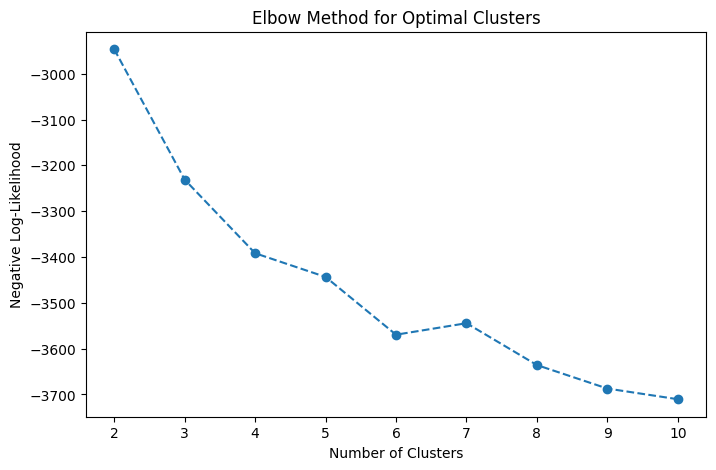

[-2946.5036485526844,
 -3231.1517531392683,
 -3391.826190805845,
 -3443.562320679887,
 -3569.6569085523297,
 -3544.5497699336365,
 -3635.953734374992,
 -3687.2262175120836,
 -3710.4988153702766]

In [25]:
# Example
file_path = '/content/transcribed_text_nptel_video_1.txt'
sentences = load_and_preprocess(file_path)
sentence_vectors = preprocess_and_vectorize(sentences)

# Plot elbow method to find the optimal number of clusters
plot_elbow_method(sentence_vectors)

In [26]:
# Example
file_path = '/content/transcribed_text_nptel_video_1.txt'
sentences = load_and_preprocess(file_path)
sentence_vectors = preprocess_and_vectorize(sentences)

n_clusters = 5 # can take 6 too
labels = fit_gmm(sentence_vectors, n_clusters)
summary,clusters = extract_summary_and_view_clusters(sentences, sentence_vectors, labels)

# Print sentences in each cluster
for cluster_id, cluster_sentences in clusters.items():
    print(f"Cluster {cluster_id}:")
    for sentence in cluster_sentences:
        print(f"  - {sentence}")
    print()

Cluster 0:
  - So in text processing if we face this kind of problem in nearly every simple task that we are doing.
  - Now so the idea is very simple.
  - So in general my classifiers that I will build can be some rules that I write by hand some simple iftenelse rules.
  - Let us see can we build a simple rulebased classifier
  - So we will start with the example of a simple decision tree.
  - So I can have this simple iftenelse kind of decision tree here.
  - So this is very very simple if then as rules.
  - So as you have seen this is a simple if then else statement.
  - So suppose I give you a simple sentence here I have a can opener but I cannot open these cans.
  - So one question I have is whether I treated as simple fill land as it is fill lands or I converted to fill lands by removing the first of it.
  - So this looks again a simple problem but we will see it is not that simple.
  - So let us say this is a simple single sentence in Sanskrit but this is a huge this looks like 

In [27]:
summary

'So this looks again a simple problem but we will see it is not that simple.Not the sentence is what the words.There are two classes end of the sentence or not end of the sentence.So now what happens if I am taking a language like Chinese or Japanese.We also do some sort of case folding that is we can reduce all that as to lower case.'

In [ ]:
# Save the summarized text to a file
with open("irrelevant_gmm_centroid_method_11_clusters.txt", "w") as file:
    file.write(summary)

print("Summarization completed.")

Summarization completed.
